In [4]:
# Importing pandas
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
# Loading in the data
pulls_one = pd.read_csv('C:/Users/S530U/Python/pulls_2011-2013.csv')
pulls_two = pd.read_csv('C:/Users/S530U/Python/pulls_2014-2018.csv')
pull_files = pd.read_csv('C:/Users/S530U/Python/pull_files.csv') 
display(pulls_two.head())

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


#### Preparing and cleaning the data


In [5]:
# Append pulls_one to pulls_two
pulls = pulls_one.append(pulls_two,ignore_index=True)

# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'],utc=True)

C:\Users\S530U\AppData\Local\Temp\ipykernel_17516\76583640.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pulls = pulls_one.append(pulls_two,ignore_index=True)


#### Merging the DataFrames


In [6]:
# Merge the two DataFrames
data = pulls.merge(pull_files,on='pid',how='inner')
display(data.head())

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


#### Is the project still actively maintained?


<AxesSubplot:xlabel='month,year'>

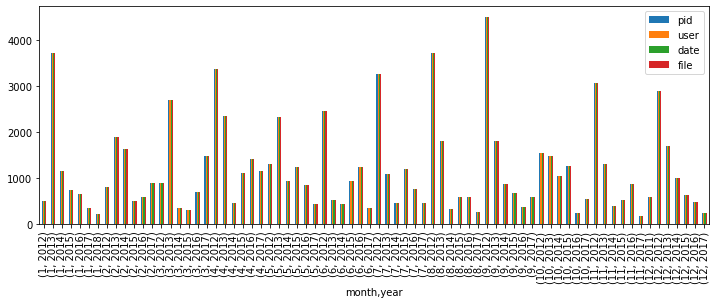

In [7]:
%matplotlib inline

# Create a column that will store the month
data['month'] = data['date'].dt.month

# Create a column that will store the year
data['year'] = data['date'].dt.year

# Group by the month and year and count the pull requests
counts = data.groupby(['month','year']).count()

# Plot the results
counts.plot(kind='bar', figsize = (12,4))

#### Is there camaraderie in the project?


array([[<AxesSubplot:title={'center':'pid'}>]], dtype=object)

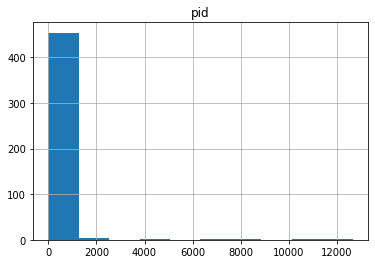

In [8]:
# Required for matplotlib
%matplotlib inline

# Group by the submitter
by_user = data[['user','pid']].groupby('user').count()

# Plot the histogram
# ... YOUR CODE FOR TASK 5 ...
by_user.hist()

#### What files were changed in the last ten pull requests?


In [9]:
# Identify the last 10 pull requests
last_10 = pulls[pulls['date'].isin(pulls['date'].nlargest(10))]

# Join the two data sets
joined_pr = last_10.merge(pull_files,on='pid',how='inner')

# Identify the unique files
files = set(joined_pr.file.unique())

# Print the results files
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

#### Who made the most pull requests to a given file?


In [10]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data.file==file]

# Count the number of changes made by each developer
author_counts = file_pr[['user','file']].groupby('user').count()

# Print the top 3 developers
# ... YOUR CODE FOR TASK 7 ...
author_counts.nlargest(3,'file')

,file
user,
xeno-by,11
retronym,5
soc,4



8. Who made the last ten pull requests on a given file?
Open source projects suffer from fluctuating membership. This makes the problem of finding the right person more challenging: the person has to be knowledgeable and still be involved in the project. A person that contributed a lot in the past might no longer be available (or willing) to help. To get a better understanding, we need to investigate the more recent history of that particular part of the system.

Like in the previous task, we will look at the history of src/compiler/scala/reflect/reify/phases/Calculate.scala.

In [12]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files.file==file]

# Merge the obtained results with the pulls DataFrame
joined_pr = file_pr.merge(pulls,on='pid',how='inner')

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr[joined_pr['date'].isin(joined_pr['date'].nlargest(10))].user)

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

9. The pull requests of two special developers
Now that we have identified two potential contacts in the projects, we need to find the person who was most involved in the project in recent times. That person is most likely to answer our questions. For each calendar year, we are interested in understanding the number of pull requests the authors submitted. This will give us a high-level image of their contribution trend to the project.

<AxesSubplot:xlabel='date'>

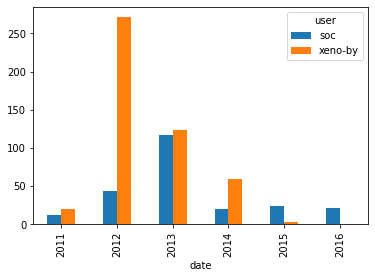

In [13]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls.user.isin(authors)]


# Count the number of pull requests submitted each year
counts = by_author.groupby(['user', by_author.date.dt.year]).agg({'pid': 'count'}).reset_index()
counts
# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
# ... YOUR CODE FOR TASK 9 ...
counts_wide.plot.bar()


#### Visualizing the contributions of each developer


<AxesSubplot:xlabel='date'>

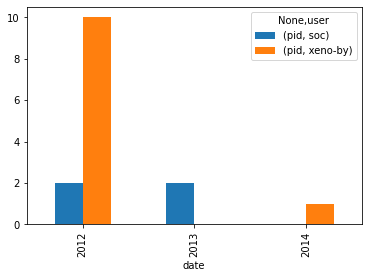

In [14]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data.user.isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author.file==file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()
grouped
# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date',columns='user',fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')